# Exercise sheet 8
## *Thanks to G. Sommani*
### Due 23/12/2022

The IceCube observatory is a cubic-kilometer high-energy neutrino detector instaled deep in the Antartic ice under the geographical South Pole.

When a high-energy neutrino interacts in the ice, a complex reconstruction method is used to estimate its arrival direction. IceCube then sends out an alert to telescopes around the globe to observe any astrophysical sources thet may lie in that reconstructed position in the sky.

Here, we are going to take a look at the method used to produce *containemnt contours*, like in Fig. 7 of [Lagunas Gualda et al 2021](https://arxiv.org/pdf/2107.08670.pdf). A 90% containment contour is defined so that when I simulate a large enough number of events and reconstruct their arrival directions, 90% of them will fall inside that contour.

Falling inside or outside of a contour is a binomial experiment. So if I perform a total of $N_\mathrm{tot}$ simulations, the probability that $n$ of them have a reconstructed direction inside this contour is given by the binomial probability mass function:

$$
\mathrm{PMF}(n) \,=\, {N_\mathrm{tot}\choose n}\,p^n\,(1-p)^{N_\mathrm{tot}-n},
$$

where in this case, we have $p=90\%$.

At the same time, the probability that ***less than $n$*** events fall inside the contour is given by the *cumulative distribution* of the same binomial statistics: 

$$
\mathrm{CDF}(n) \,=\, \sum_{i=0}^{n}\mathrm{PMF}(i)
$$

This is summarized in the plot below.

In black we show the binomial PMF for $p=90\%$ and $N_\mathrm{tot}=100$, as a function of integer values of $n$.

The area shaded in blue is the range of $n$ for which $\mathrm{CDF}(n)\leq 5\%$. In other words, if the number of events $n$ that fall inside our contour is within this blue range, our model can be excluded with a 95% confidence level.

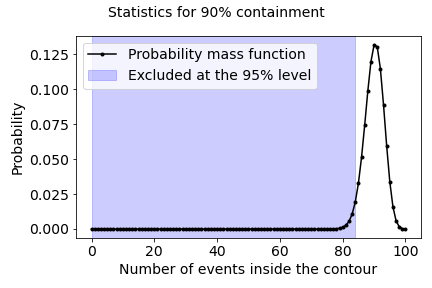

In [2]:
from IPython.display import Image
Image(filename='ex-08-example.png')

Your task this week is simply to reproduce the plot above. Here are a few tips:

1) Instead of implementing the functions above, you can use SciPy's implementations:
    - `binom.pmf(n, n_total, p)`
    - `binom.cdf(n, n_total, p)`,
    
where `n` can be either a single value or an entire numpy array of values of $n$.

2) To get the blue area, you can start by calculating the CDF of the entire array of integers $n$ and checking what is the lowest number $n_\mathrm{thresh}$ for which $\mathrm{CDF}(n_\mathrm{thresh})\geq5\%$. Then, you can use use the function `plt.axvspan` to fill out the area up to $n_\mathrm{thresh}$. Make sure it's translucid by using the `alpha` parameter that constrols the transparency of the color. 

3) All the text and axis labels in the example have font size 14.

4) You can choose where to place the legend by using the `loc` parameter.

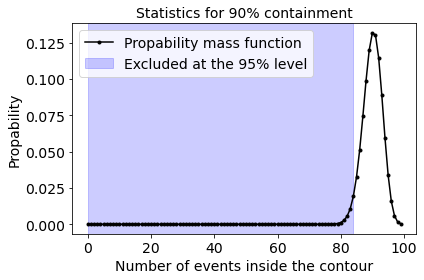

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from matplotlib.ticker import StrMethodFormatter

p = 0.9
n = 100
x_0 = np.arange(0,n)
y_0 = binom.pmf(x_0, n, p)


plt.title('Statistics for 90% containment', fontsize = '14')

plt.xlabel('Number of events inside the contour', fontsize = '14')
plt.ylabel('Propability', fontsize = '14')

plt.xticks(fontsize = '14')
plt.yticks(np.arange(0, 0.15 , 0.025), fontsize = '14')

arr_n_tresh = binom.cdf(x_0, n, p)
n_tresh = sum(arr_n_tresh < 0.05) - 1

plt.plot(x_0, y_0, marker = '.', c = 'black', label = 'Propability mass function')
plt.axvspan(0, n_tresh, color = 'blue', alpha=0.2, label = 'Excluded at the 95% level')

plt.legend(fontsize = '14', loc = 'upper left')
plt.tight_layout()
plt.show()